# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')
pal =  ['#FEEFE5', '#F8C8B0', '#E45011', '#87280E','#0F0608']

df = pd.read_csv('https://raw.githubusercontent.com/mchosasih99/dataset/main/Clicked%20Ads%20Dataset.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [3]:
df.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [4]:
df.describe(include='object')

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


In [5]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [6]:
# Menghapus kolom
df.drop('Unnamed: 0',1,inplace=True)

## Modifikasi kolom datetime

In [7]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
df['Time'] = pd.to_datetime(df['Timestamp']).dt.time
df['hari'] = pd.to_datetime(df['Date']).dt.day
df['hari_dalam_minggu'] = pd.to_datetime(df['Date']).dt.day_of_week
df['minggu'] = pd.to_datetime(df['Date']).dt.week
df['bulan'] = pd.to_datetime(df['Date']).dt.month

df.drop(['Timestamp','Date'],1, inplace=True)

In [8]:
df[['jam','menit','detik']] = df['Time'].astype(str).str.split(':', expand=True)
df['jam'] = df['jam'].astype(int)

In [9]:
#Group Labeling Waktu
conditions = [
    df['jam'].isin(list(range(0,4))),
    df['jam'].isin(list(range(4,11))),
    df['jam'].isin(list(range(11,15))),
    df['jam'].isin(list(range(15,19))),
    df['jam'].isin(list(range(19,25)))
]

choices = ['malam', 'pagi', 'siang', 'sore', 'malam']

df['waktu_iklan'] = np.select(conditions, choices)


In [10]:
#Menghapus kolom yang tidak perlu
df.drop(['jam','detik','menit','Time'], 1,inplace=True)

## Mengisi Null Value

In [11]:
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean(),
                                      inplace=True)
df['Male'].fillna('Perempuan',
                  inplace=True)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean(),
                                  inplace=True)

In [12]:
# Mengisi Null Value dengan median tiap city

#Agregasi median income
income_median = df.groupby('city').agg({'Area Income':
                                        'median'}).reset_index() 
#Mengambil dataframe null
df_null = df[df['Area Income'].isnull()]
#Membuat dataframe baru
df_fillna = df_null.merge(income_median,
                          on='city',
                          how='left')
df_fillna.drop('Area Income_x',1,inplace=True)
df_fillna.rename(columns=({'Area Income_y': 'Area Income'}),inplace=True)
df_fillna = df_fillna[list(df.columns)] 

df_clean = df.append(df_fillna) #Append ke dataframe baru
df_clean.dropna(inplace=True) #Delete null value
df_clean = df_clean.reset_index(drop=True) #Reset index

In [13]:
#Merubah Value Target
df_clean['Clicked on Ad'].replace({'Yes':1,'No':0},inplace=True)

In [14]:
#Merubah nama kolom
df_clean.rename(columns={'Male':'jenis_kelamin'},inplace=True)

# Data Preprocessing

## Feature Encoding

In [15]:
df_encode = df_clean.copy()

In [16]:
df_encode.describe(include='object')

,jenis_kelamin,city,province,category,waktu_iklan
count,1000,1000,1000,1000,1000
unique,2,30,16,10,4
top,Perempuan,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif,malam
freq,521,64,253,112,379


City memiliki banyak sekali jumlah unique value, sehingga fitur tersebut akan dihapus untuk mencegah overfitting.

In [17]:
df_encode.drop('city',1,inplace=True)

In [18]:
#Label

df_encode.jenis_kelamin.replace({'Perempuan':0,
                                 'Laki-Laki':1},inplace=True)

In [19]:
#One Hot Encoding
onehot = ['province',
          'category','waktu_iklan']
for i in onehot:
    onehots = pd.get_dummies(df_encode[i], prefix=i)
    df_encode = df_encode.join(onehots)
    
df_encode = df_encode.drop(columns=onehot, axis =1)

## Train Test Split

In [20]:
# Pemisahan Features vs Target

X = df_encode.drop(columns=['Clicked on Ad'], axis=1)
y = df_encode['Clicked on Ad']
print(X.shape)
print(y.shape)

(1000, 39)
(1000,)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state = 42)

X_train_raw = X_train.copy()
X_test_raw = X_test.copy()

## Feature Transformation

In [22]:
# Fitur transformasi menggunakan log
transform = ['Daily Time Spent on Site', 'Age',
             'Area Income', 'Daily Internet Usage']

X_train.loc[:, transform] = np.log(X_train[transform])
X_test.loc[:, transform] = np.log(X_test[transform])

## Feature Standardization

In [23]:
#Merubah skala fitur menjadi 0,1
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()

X_train[transform] = ss.fit_transform(X_train[transform].values.reshape(len(X_train),4))

X_test[transform] = ss.fit_transform(X_test[transform].values.reshape(len(X_test),4))

# Data Modeling

## Auto ML

### Data Standarisasi

**Data Modeling dilakukan menggunakan auto-sklearn.**

In [ ]:
# pip install auto-sklearn

In [26]:
import autosklearn.classification

In [27]:
# Inisiasi model
model = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=7*60, per_run_time_limit=30, n_jobs=2)

# Fitting model
model.fit(X_train, y_train)

# Ringkasan evaluasi auto ml
print(model.sprint_statistics())

auto-sklearn results:
  Dataset name: 7eace1c8-f1e9-11ec-8168-0242ac1c0002
  Metric: accuracy
  Best validation score: 0.986486
  Number of target algorithm runs: 49
  Number of successful target algorithm runs: 47
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 2
  Number of target algorithms that exceeded the memory limit: 0



In [29]:
print(model.leaderboard())

          rank  ensemble_weight                 type      cost   duration
model_id                                                                 
3            1             0.14        random_forest  0.013514   6.995527
48           2             0.02        random_forest  0.018018   5.977085
18           3             0.04        random_forest  0.018018   6.096796
50           4             0.04        random_forest  0.022523   5.266626
38           5             0.02        liblinear_svc  0.022523   4.810101
35           6             0.04   passive_aggressive  0.022523   2.092563
19           7             0.02                  mlp  0.022523   3.697578
45           8             0.04        random_forest  0.027027   7.089467
26           9             0.08  k_nearest_neighbors  0.027027   5.984113
25          10             0.04        random_forest  0.027027   9.844723
2           11             0.08        random_forest  0.031532   6.094028
8           12             0.02       

### Tanpa Standarisasi

In [28]:
# Inisiasi model_raw
model_raw = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=7*60, per_run_time_limit=30, n_jobs=2)

# Fitting model_raw
model_raw.fit(X_train_raw, y_train)

# Ringkasan evaluasi auto ml
print(model_raw.sprint_statistics())

auto-sklearn results:
  Dataset name: 7b0ed492-f1ea-11ec-8168-0242ac1c0002
  Metric: accuracy
  Best validation score: 0.986486
  Number of target algorithm runs: 59
  Number of successful target algorithm runs: 57
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 0



In [30]:
print(model_raw.leaderboard())

          rank  ensemble_weight               type      cost  duration
model_id                                                              
3            1             0.12      random_forest  0.013514  4.655343
18           2             0.02      random_forest  0.018018  5.096306
19           3             0.02                mlp  0.022523  3.964118
30           4             0.02                sgd  0.027027  3.903711
55           5             0.10      random_forest  0.027027  5.935253
25           6             0.02      random_forest  0.027027  5.205625
2            7             0.04      random_forest  0.031532  4.230922
8            8             0.02                mlp  0.036036  6.738330
45           9             0.02        extra_trees  0.036036  5.723123
28          10             0.10      random_forest  0.040541  7.781758
5           11             0.02  gradient_boosting  0.040541  3.073010
46          12             0.04         libsvm_svc  0.040541  3.871048
54    

## Evaluasi model

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

def eval_classification_raw(model):
    y_pred = model.predict(X_test_raw)
    y_pred_train = model.predict(X_train_raw)
    y_pred_proba = model.predict_proba(X_test_raw)
    y_pred_proba_train = model.predict_proba(X_train_raw)
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    
#Confusion plot
def fixConfusion(y_pred_train, y_train):
  v_array = confusion_matrix(y_pred_train, y_train)
  tes=v_array
  tes2=[[],[]]
  n=len(tes)-1
  for i in range(0,len(tes)):
    m=len(tes[i])-1
    for j in range(0, len(tes[i])):
      tes2[i].append(tes[n][m])     
      m-=1
    n-=1

  tes2=np.array(tes2)
  sns.heatmap(tes2, annot=tes2, fmt='', cmap='Reds')

### Data Standarisasi

In [32]:
#Evaluation
eval_classification(model)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.96
Precision (Train Set): 1.00
Precision (Test Set): 0.95
Recall (Train Set): 0.99
Recall (Test Set): 0.95
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.95
AUC (train-proba): 1.00
AUC (test-proba): 0.99


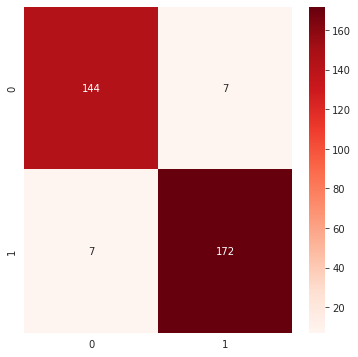

In [33]:
#Confusion Plot
plt.figure(figsize=(6,6))
y_pred = model.predict(X_test)
fixConfusion(y_test, y_pred)

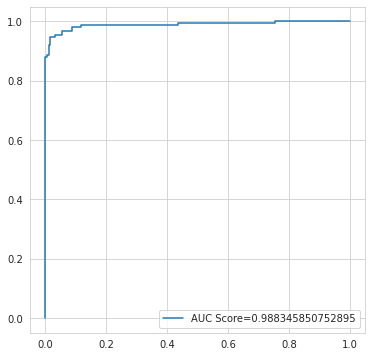

In [34]:
#ROC Plot
from sklearn import metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,label="AUC Score="+str(auc))
plt.legend(loc=4)
plt.show()

### Tanpa Standarisasi

In [35]:
#Evaluation
eval_classification_raw(model)

Accuracy (Train Set): 0.48
Accuracy (Test Set): 0.54
Precision (Train Set): 0.00
Precision (Test Set): 0.00
Recall (Train Set): 0.00
Recall (Test Set): 0.00
F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00
AUC (train-proba): 0.59
AUC (test-proba): 0.55


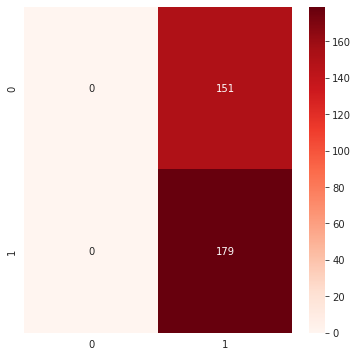

In [36]:
#Confusion Plot
plt.figure(figsize=(6,6))
y_pred_raw = model.predict(X_test_raw)
fixConfusion(y_test, y_pred_raw)

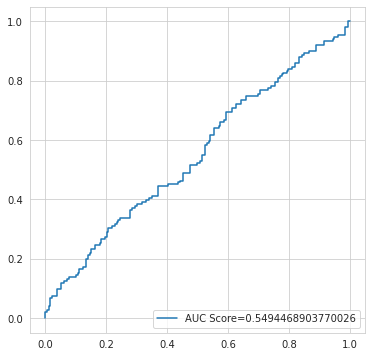

In [37]:
#ROC Plot
from sklearn import metrics
y_pred_proba = model.predict_proba(X_test_raw)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,label="AUC Score="+str(auc))
plt.legend(loc=4)
plt.show()

Data yang dilakukan Standarisasi memiliki performa yang jauh lebih baik. Jadi yang diambil adalah model dengan menggunakan data standarisasi.

## Menyimpan Model

In [38]:
import pickle

In [39]:
# save model
with open('customer-click-ad-classifier.pkl', 'wb') as f:
    pickle.dump(model, f)

## Menjelaskan Model

In [40]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


In [41]:
import shap

In [43]:
explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train, 128))
shap_values = explainer.shap_values(X_test[:100], nsamples=10)

[WARNING] [2022-06-22 05:28:32,940:shap] Using 128 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/100 [00:00<?, ?it/s]

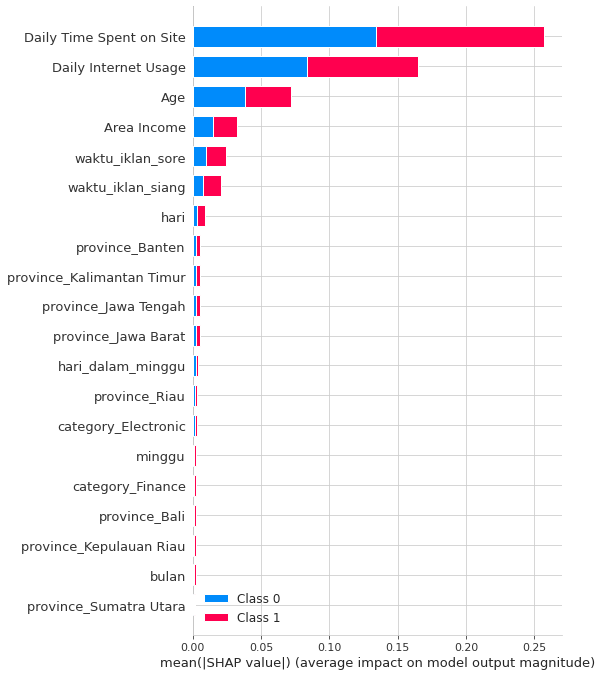

In [44]:
shap.summary_plot(shap_values, X_test.values, feature_names = X.columns)

Fitur yang paling berpengaruh kepada model adalah Daily Time Spent on Site, Daiily Internet Usage, Age dan Area Income.